In [1]:
import pandas as pd
import numpy as np
from pandas import HDFStore
from celldom.core import cytometry
import matplotlib.pyplot as plt

In [2]:
import dash_core_components as dcc

In [2]:
!du -ch /lab/data/celldom/output/20180908-G3-full/*

50M	/lab/data/celldom/output/20180908-G3-full/data.h5
463M	/lab/data/celldom/output/20180908-G3-full/images.h5
512M	total


In [5]:
#store = cytometry.get_readonly_datastore('/lab/data/celldom/output/20180908-G3-full')
store = cytometry.get_readonly_datastore('/lab/data/celldom/output/20180820-G3-full')

In [6]:
#df = store.get('apartment')
df = store.get('table_apartment')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123019 entries, 0 to 4
Data columns (total 36 columns):
acq_apartment             123019 non-null object
acq_cohort                123019 non-null object
acq_color                 123019 non-null object
acq_condition             123019 non-null object
acq_datetime              123019 non-null datetime64[ns]
acq_hours                 123019 non-null object
acq_id                    123019 non-null object
acq_processed_at          123019 non-null datetime64[ns]
acq_pump                  123019 non-null object
acq_street                123019 non-null object
apt_id                    123019 non-null int64
apt_image_height          123019 non-null int64
apt_image_width           123019 non-null int64
apt_num                   123019 non-null object
apt_num_digit_scores      123019 non-null object
cell_area_mean            113407 non-null float64
cell_area_p10             113407 non-null float64
cell_area_p50             113407 non-null floa

In [9]:
dft = df[df['acq_pump'] == 'Elveflow']
dft = dft[dft['acq_condition'] == '3']
dft = dft[dft['acq_color'] == 'Red']
dft = dft[dft['acq_cohort'] == 'Control']
len(dft)

5444

In [11]:
dft['acq_datetime'].unique()

array(['2018-06-27T13:55:00.000000000', '2018-06-27T13:56:00.000000000',
       '2018-06-27T13:57:00.000000000', '2018-06-28T11:44:00.000000000',
       '2018-06-28T11:45:00.000000000', '2018-06-28T11:46:00.000000000',
       '2018-06-29T11:51:00.000000000', '2018-06-29T11:52:00.000000000',
       '2018-06-29T11:53:00.000000000', '2018-06-30T16:21:00.000000000',
       '2018-06-30T16:22:00.000000000', '2018-06-30T16:23:00.000000000',
       '2018-06-30T16:24:00.000000000', '2018-07-01T18:22:00.000000000',
       '2018-07-01T18:23:00.000000000', '2018-07-01T18:24:00.000000000',
       '2018-07-01T18:25:00.000000000', '2018-07-02T15:27:00.000000000',
       '2018-07-02T15:28:00.000000000', '2018-07-02T15:29:00.000000000',
       '2018-07-02T15:30:00.000000000', '2018-07-03T20:16:00.000000000',
       '2018-07-03T20:17:00.000000000', '2018-07-03T20:18:00.000000000'],
      dtype='datetime64[ns]')

In [13]:
dft[['st_num', 'apt_num']].astype(int).describe()

,st_num,apt_num
count,5444.000000,5444.000000
mean,7.251653,28.580456
std,4.880780,16.499839
min,0.000000,0.000000
25%,3.000000,14.000000
50%,7.000000,29.000000
75%,11.000000,43.000000
max,69.000000,90.000000


In [16]:
pd.Series([np.nan, np.nan]).max() or 1

nan

In [10]:
dft.groupby(['st_num', 'apt_num'])['cell_count'].median().unstack()

apt_num,00,01,02,03,04,05,06,07,08,09,...,52,53,54,55,56,57,61,62,67,90
st_num,,,,,,,,,,,,,,,,,,,,,
00,36.0,35.0,4.0,21.0,2.0,8.0,3.0,8.0,1.0,5.0,...,1.5,2.5,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
01,43.0,14.0,22.0,25.0,10.0,12.0,11.0,9.0,17.0,5.0,...,2.5,NaN,1.0,6.0,2.0,2.0,NaN,NaN,NaN,14.0
02,0.0,5.0,18.0,22.0,13.0,1.0,15.0,5.0,4.0,11.0,...,4.0,1.0,4.0,3.5,3.0,2.0,NaN,NaN,NaN,NaN
03,16.0,3.0,11.0,11.0,3.0,4.5,2.0,13.5,5.0,3.0,...,11.0,8.5,5.0,3.0,8.5,0.0,NaN,NaN,NaN,NaN
04,2.0,7.0,11.0,8.5,16.0,7.0,4.5,2.0,4.5,6.0,...,4.0,4.0,3.0,3.0,7.0,5.0,NaN,NaN,NaN,NaN
05,10.0,3.0,6.0,8.0,1.0,5.0,3.0,12.0,2.0,2.0,...,6.0,2.0,7.0,2.5,2.0,1.5,NaN,NaN,NaN,NaN
06,9.0,5.0,25.0,21.0,8.0,1.0,5.5,7.5,14.0,3.0,...,3.0,0.0,5.0,2.5,1.5,0.0,NaN,NaN,NaN,NaN
07,48.0,10.0,2.0,5.0,10.0,4.0,7.5,18.5,3.0,4.0,...,3.5,2.0,3.5,1.0,1.0,2.0,NaN,NaN,NaN,NaN
08,2.5,26.5,54.0,9.0,15.5,10.0,4.0,19.0,25.0,5.0,...,14.0,3.0,1.0,5.0,8.0,1.0,NaN,NaN,NaN,NaN


In [5]:
store = cytometry.get_readonly_images('/lab/data/celldom/output/20180908-G3-full')

OSError: HDF5 error back trace

  File "H5F.c", line 604, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1087, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 277, in H5F_super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/lab/data/celldom/output/20180908-G3-full/images.h5'

In [22]:
store.store.keys()[-5:]

['/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_7/shape',
 '/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_8/data',
 '/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_8/shape',
 '/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_9/data',
 '/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_9/shape']

In [25]:
img = store.load_image('/apartment/acq_id_005949466cd3bb642d308a866fc47135/apt_id_9')
img.shape, img.dtype

((224, 235), dtype('uint8'))

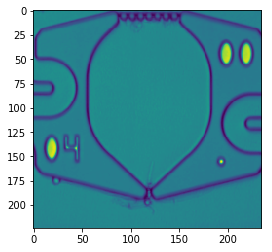

In [26]:
plt.imshow(img)

In [30]:
store = cytometry.get_readonly_datastore('/lab/data/celldom/output/20180908-G3-full')

In [31]:
df = store.get('apartment')
df.head()

,acq_apartment,acq_cohort,acq_color,acq_condition,acq_datetime,acq_hours,acq_id,acq_processed_at,acq_pump,acq_street,...,cell_solidity_mean,cell_solidity_p10,cell_solidity_p50,cell_solidity_p90,cell_solidity_std,focus_score,marker_center_x,marker_center_y,st_num,st_num_digit_scores
0,016,0.1uM,Orange,1,2018-06-15 11:37:00,12,a14296657b71771250abb9e5fb1d9eec,2018-09-09 13:15:10,gravity,000,...,0.972237,0.968806,0.971014,0.976158,0.004715,0,225,328,02,"1.000,1.000"
1,016,0.1uM,Orange,1,2018-06-15 11:37:00,12,a14296657b71771250abb9e5fb1d9eec,2018-09-09 13:15:10,gravity,000,...,0.973937,0.968472,0.973937,0.979403,0.009662,0,484,329,01,"1.000,1.000"
2,016,0.1uM,Orange,1,2018-06-15 11:37:00,12,a14296657b71771250abb9e5fb1d9eec,2018-09-09 13:15:10,gravity,000,...,0.971750,0.954018,0.963636,0.992727,0.025193,0,741,329,00,"1.000,1.000"
3,016,0.1uM,Orange,1,2018-06-15 11:37:00,12,a14296657b71771250abb9e5fb1d9eec,2018-09-09 13:15:10,gravity,000,...,0.972619,0.961837,0.973856,0.982021,0.010204,0,613,527,01,"1.000,1.000"
4,016,0.1uM,Orange,1,2018-06-15 11:37:00,12,a14296657b71771250abb9e5fb1d9eec,2018-09-09 13:15:10,gravity,000,...,0.980362,0.976916,0.982143,0.983095,0.004158,0,873,527,00,"1.000,1.000"


In [32]:
df = df.set_index(['acq_pump', 'acq_color', 'acq_condition', 'acq_cohort', 'apt_num', 'st_num'])

In [35]:
df.index.unique()

MultiIndex(levels=[['Elveflow', 'gravity'], ['Blue', 'Green', 'Orange', 'Pink', 'Red', 'White', 'Yellow'], ['1', '3'], ['0.1uM', '0.3uM', '0.5uM', 'Control'], ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '59', '66', '70', '72', '74', '75', '76', '77', '78', '79', '89', '91', '95'], ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '16', '70', '72', '73', '74', '76', '77', '80']],
           labels=[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

In [16]:
np.any(df.index.duplicated())

True

In [17]:
df.index.unique()

<bound method Index.unique of MultiIndex(levels=[['Elveflow', 'gravity'], ['Blue', 'Green', 'Orange', 'Pink', 'Red', 'White', 'Yellow'], ['1', '3'], ['0.1uM', '0.3uM', '0.5uM', 'Control'], ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '59', '66', '70', '72', '74', '75', '76', '77', '78', '79', '89', '91', '95'], ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '16', '70', '72', '73', '74', '76', '77', '80']],
           labels=[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 